In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Функция для построения боксплота для выбранных данных
def get_boxplot(column, index, dataframe):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y=index,
                data=dataframe,
                ax=ax)
    plt.xticks()
    ax.set_title('Boxplot for ' + column)
    plt.show()
    print()

Посмотрим в целом, в какие города летели рейсы из Анапы зимой 2017 года.

In [3]:
general = pd.read_csv('First_query.csv')

In [4]:
display(general) # Есть рейсы в Белгород, Новокузнецк и Москву

,departure_airport,arrival_airport,city,flights_number,model,aircraft_code
0,AAQ,EGO,Belgorod,59,Sukhoi Superjet-100,SU9
1,AAQ,NOZ,Novokuznetsk,9,Boeing 737-300,733
2,AAQ,SVO,Moscow,59,Boeing 737-300,733


Загрузим главный датасет 

In [5]:
flights = pd.read_csv('flights.csv')

In [6]:
display(flights.sample(5))
flights.info()

,flight_id,seats_number,total_amount,flight_no,departure,weekday,duration,departure_airport,arrival_airport,aircraft_code
28,136282,106,1518800.0,PG0252,2017-01-16 13:05:00,Monday,100.0,AAQ,SVO,733
27,136275,125,1825000.0,PG0252,2017-01-13 13:05:00,Friday,100.0,AAQ,SVO,733
31,136310,117,1654200.0,PG0252,2017-01-22 13:05:00,Sunday,100.0,AAQ,SVO,733
104,136869,97,765300.0,PG0480,2017-01-31 12:25:00,Tuesday,50.0,AAQ,EGO,SU9
102,136857,97,765300.0,PG0480,2017-02-13 12:25:00,Monday,50.0,AAQ,EGO,SU9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          118 non-null    int64  
 1   seats_number       118 non-null    int64  
 2   total_amount       118 non-null    float64
 3   flight_no          118 non-null    object 
 4   departure          118 non-null    object 
 5   weekday            118 non-null    object 
 6   duration           118 non-null    float64
 7   departure_airport  118 non-null    object 
 8   arrival_airport    118 non-null    object 
 9   aircraft_code      118 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 9.3+ KB


Описание датасета:

 0   flight_id          - Уникальный ID рейса  
 
 1   seats_number       - Количество занятых мест на этом рейсе  
 
 2   total_amount       - Общая стоимость билетов на рейс
 
 3   flight_no          - Номер рейса
 
 4   departure          - Дата и время отправления 
 
 5   weekday            - День недели, когда выполнялся рейс
 
 6   duration           - Продожительность полета, минуты
 
 7   departure_airport  - Аэропорт отправления (Анапа)
 
 8   arrival_airport    - Аэропорт прибытия
 
 9   aircraft_code      - Код модели самолета
 

In [7]:
flights.describe()

,flight_id,seats_number,total_amount,duration
count,118.000000,118.000000,1.180000e+02,118.00000
mean,136533.440678,101.652542,1.176506e+06,75.00000
std,261.971994,14.295643,4.794251e+05,25.10661
min,136119.000000,64.000000,5.310000e+05,50.00000
25%,136286.250000,95.000000,7.464000e+05,50.00000
50%,136528.500000,97.000000,1.081650e+06,75.00000
75%,136768.500000,111.750000,1.625850e+06,100.00000
max,136956.000000,130.000000,1.886000e+06,100.00000


In [8]:
flights.describe(include=['object'])

,flight_no,departure,weekday,departure_airport,arrival_airport,aircraft_code
count,118,118,118,118,118,118
unique,2,118,7,1,2,2
top,PG0252,2017-02-03 12:25:00,Tuesday,AAQ,SVO,SU9
freq,59,1,18,118,59,59


In [9]:
# Видим, что осталось два аэропорта прибытия. Проверим, какого аэропорта нет.
flights.arrival_airport.unique()

array(['SVO', 'EGO'], dtype=object)

Как видим, для Новокузнецка нет данных о проданных билетах. 
Необходимо выяснить, с чем это связано, и провести анализ этих рейсов дополнительно.

Рассмотрим отдельно рейсы в Белгород и Москву

# Белгород

In [10]:
EGO = flights[flights.arrival_airport == 'EGO']

## Затраты на топливо на рейс Анапа-Белгород
Расход топлива Sukhoi Superjet-100, который используется на рейсах Анапа-Белгород - 1700 кг/ч.
Стоимость топлива в зависимости от аэропорта варьирует в среднем от 35000 до 65000 руб/т.
Для первоначальной оценки примем стоимость топлива равной 50000 руб/т.
На 50 минут полета Анапа-Белгород необходимо 1417 кг топлива, его стоимость 70850 рублей.

In [11]:
# Добавим столбик с прибылью (общий доход - расходы на топливо)
EGO['profit'] = EGO['total_amount'].apply(lambda x: x - 70850)

<ipython-input-11-7d9aefae60e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EGO['profit'] = EGO['total_amount'].apply(lambda x: x - 70850)


In [12]:
display(EGO.sample(10))

,flight_id,seats_number,total_amount,flight_no,departure,weekday,duration,departure_airport,arrival_airport,aircraft_code,profit
117,136956,96,746400.0,PG0480,2017-02-04 12:25:00,Saturday,50.0,AAQ,EGO,SU9,675550.0
73,136661,96,759000.0,PG0480,2017-01-01 12:25:00,Sunday,50.0,AAQ,EGO,SU9,688150.0
74,136666,87,664500.0,PG0480,2017-02-09 12:25:00,Thursday,50.0,AAQ,EGO,SU9,593650.0
96,136823,78,620400.0,PG0480,2017-02-05 12:25:00,Sunday,50.0,AAQ,EGO,SU9,549550.0
62,136605,97,765300.0,PG0480,2017-02-15 12:25:00,Wednesday,50.0,AAQ,EGO,SU9,694450.0
68,136642,64,531000.0,PG0480,2017-01-30 12:25:00,Monday,50.0,AAQ,EGO,SU9,460150.0
72,136660,87,677100.0,PG0480,2017-02-20 12:25:00,Monday,50.0,AAQ,EGO,SU9,606250.0
79,136709,87,689700.0,PG0480,2017-01-15 12:25:00,Sunday,50.0,AAQ,EGO,SU9,618850.0
99,136841,97,765300.0,PG0480,2017-02-07 12:25:00,Tuesday,50.0,AAQ,EGO,SU9,694450.0
64,136612,94,746400.0,PG0480,2017-02-21 12:25:00,Tuesday,50.0,AAQ,EGO,SU9,675550.0


In [13]:
EGO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 59 to 117
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          59 non-null     int64  
 1   seats_number       59 non-null     int64  
 2   total_amount       59 non-null     float64
 3   flight_no          59 non-null     object 
 4   departure          59 non-null     object 
 5   weekday            59 non-null     object 
 6   duration           59 non-null     float64
 7   departure_airport  59 non-null     object 
 8   arrival_airport    59 non-null     object 
 9   aircraft_code      59 non-null     object 
 10  profit             59 non-null     float64
dtypes: float64(3), int64(2), object(6)
memory usage: 5.5+ KB


In [14]:
EGO.describe()

,flight_id,seats_number,total_amount,duration,profit
count,59.000000,59.000000,59.000000,59.0,59.000000
mean,136768.220339,90.186441,710435.593220,50.0,639585.593220
std,112.072801,8.101670,65835.266628,0.0,65835.266628
min,136571.000000,64.000000,531000.000000,50.0,460150.000000
25%,136663.500000,86.500000,667350.000000,50.0,596500.000000
50%,136769.000000,95.000000,746400.000000,50.0,675550.000000
75%,136859.000000,97.000000,765300.000000,50.0,694450.000000
max,136956.000000,97.000000,765300.000000,50.0,694450.000000


Посмотрим загруженность рейсов, выручку и прибыль.

In [15]:
# Сколько рейсов по маршруту Анапа-Белгород имеют загруженность выше средней?
len(EGO[EGO.seats_number >  EGO.seats_number.mean()]) # Больше половины

34

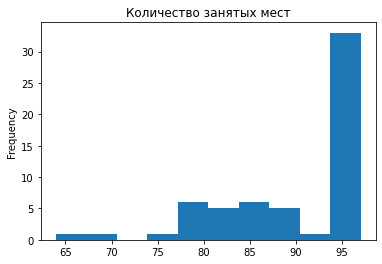

In [16]:
# Посмотрим распределение количества занятых мест на гистограмме
EGO.seats_number.plot(kind = 'hist', title = 'Количество занятых мест', bins = 10)

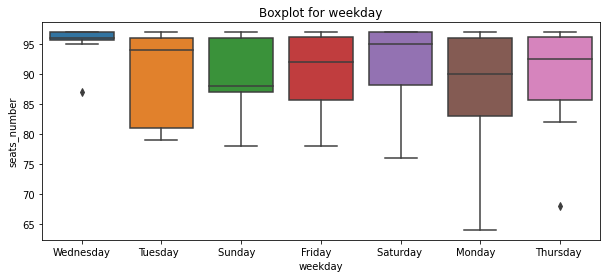

In [17]:
# Посмотрим загруженность рейсов в зависимости от дня недели
get_boxplot('weekday', 'seats_number', EGO)

Очень нестабильная загрузка в понедельник, стабильно высокая загрузка по средам.

In [18]:
# Сгруппируем данные по дням недели.
grouped_EGO = round(EGO.groupby(['weekday']).mean(), 2)
grouped_EGO

,flight_id,seats_number,total_amount,duration,profit
weekday,,,,,
Friday,136757.75,89.88,706162.50,50.0,635312.50
Monday,136801.00,87.78,694333.33,50.0,623483.33
Saturday,136772.62,91.00,717750.00,50.0,646900.00
Sunday,136770.67,89.67,707766.67,50.0,636916.67
Thursday,136759.50,89.00,698925.00,50.0,628075.00
Tuesday,136787.11,89.33,698466.67,50.0,627616.67
Wednesday,136722.12,95.12,753487.50,50.0,682637.50


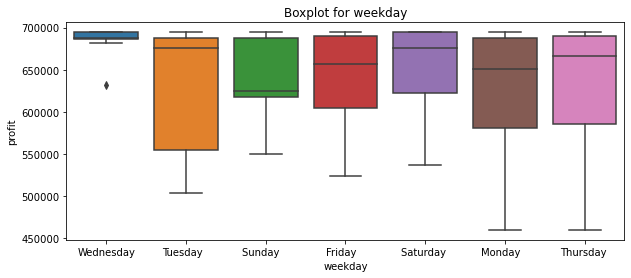

In [19]:
# Посмотрим распределение выручки по дням недели.
get_boxplot('weekday', 'profit', EGO)

Убыточных рейсов нет.
Для отдельных рейсов по понедельника и четвергам прибыль была меньше 500 тысяч рублей.

In [20]:
# Посмотрим на 10% рейсов с самой низкой прибылью.
EGO.sort_values(by=['profit']).head(6)

,flight_id,seats_number,total_amount,flight_no,departure,weekday,duration,departure_airport,arrival_airport,aircraft_code,profit
93,136807,68,531000.0,PG0480,2017-02-23 12:25:00,Thursday,50.0,AAQ,EGO,SU9,460150.0
68,136642,64,531000.0,PG0480,2017-01-30 12:25:00,Monday,50.0,AAQ,EGO,SU9,460150.0
100,136844,79,575100.0,PG0480,2017-02-28 12:25:00,Tuesday,50.0,AAQ,EGO,SU9,504250.0
107,136887,78,595200.0,PG0480,2017-01-20 12:25:00,Friday,50.0,AAQ,EGO,SU9,524350.0
111,136922,76,607800.0,PG0480,2017-02-11 12:25:00,Saturday,50.0,AAQ,EGO,SU9,536950.0
65,136620,79,613500.0,PG0480,2017-02-17 12:25:00,Friday,50.0,AAQ,EGO,SU9,542650.0


Гипотеза: Если занято менее 70 мест, выручка меньше 500000 рублей, меньше 80 мест - выручка меньше 550000 рублей

Гипотеза:
Так как маловероятно, что загруженность рейсов, например, 23 февраля 2017 г. и 23 февраля 2021 г. будет одинакова, то нельзя убирать рейс в какой-то конкретный день, а нужно искать более общий критерий для решения об отмене рейса.

Самый простой вариант - отменить рейсы в один из дней недели, например, по понедельникам, так как в этот день самая низкая средняя загрузка и прибыль.

В качестве мозгового штурма можно предложить такую идею: Если есть возможность более динамично реагировать, то, проанализировав все затраты на перебронирование билетов пассажиров и возможные репутационные риски, можно предложить отменять рейсы, если забронировано, например, менее 70 мест, а пассажиров отправлять другими рейсами. 

# Москва

In [21]:
SVO = flights[flights.arrival_airport == 'SVO']

## Затраты на топливо на рейс Анапа-Москва
Расход топлива Boeing 737-300, который летает на рейсах Анапа-Москва - 2600 кг/ч.
Стоимость топлива в зависимости от аэропорта варьирует в среднем от 35000 до 65000 руб/т.
Для первоначальной оценки примем стоимость топлива равной 50000 руб/т. 
На 100 минут полета Анапа-Москва необходимо 4333 кг топлива, его стоимость 216650 рублей.

In [22]:
# Добавим столбик с прибылью (общий доход - расходы на топливо)
SVO['profit'] = SVO['total_amount'].apply(lambda x: x - 216650)

<ipython-input-22-78281512e894>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SVO['profit'] = SVO['total_amount'].apply(lambda x: x - 216650)


In [23]:
display(SVO.sample(5))

,flight_id,seats_number,total_amount,flight_no,departure,weekday,duration,departure_airport,arrival_airport,aircraft_code,profit
7,136146,109,1604200.0,PG0252,2017-02-09 13:05:00,Thursday,100.0,AAQ,SVO,733,1387550.0
0,136119,113,1653000.0,PG0252,2017-01-03 13:05:00,Tuesday,100.0,AAQ,SVO,733,1436350.0
1,136120,109,1605400.0,PG0252,2017-02-24 13:05:00,Friday,100.0,AAQ,SVO,733,1388750.0
42,136389,129,1873800.0,PG0252,2017-01-18 13:05:00,Wednesday,100.0,AAQ,SVO,733,1657150.0
55,136471,120,1762800.0,PG0252,2017-01-17 13:05:00,Tuesday,100.0,AAQ,SVO,733,1546150.0


In [24]:
SVO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          59 non-null     int64  
 1   seats_number       59 non-null     int64  
 2   total_amount       59 non-null     float64
 3   flight_no          59 non-null     object 
 4   departure          59 non-null     object 
 5   weekday            59 non-null     object 
 6   duration           59 non-null     float64
 7   departure_airport  59 non-null     object 
 8   arrival_airport    59 non-null     object 
 9   aircraft_code      59 non-null     object 
 10  profit             59 non-null     float64
dtypes: float64(3), int64(2), object(6)
memory usage: 5.5+ KB


In [25]:
SVO.describe()

,flight_id,seats_number,total_amount,duration,profit
count,59.000000,59.000000,5.900000e+01,59.0,5.900000e+01
mean,136298.661017,113.118644,1.642576e+06,100.0,1.425926e+06
std,117.208716,8.896115,1.318786e+05,0.0,1.318786e+05
min,136119.000000,97.000000,1.398000e+06,100.0,1.181350e+06
25%,136193.500000,107.000000,1.543200e+06,100.0,1.326550e+06
50%,136284.000000,112.000000,1.628600e+06,100.0,1.411950e+06
75%,136407.000000,120.000000,1.738400e+06,100.0,1.521750e+06
max,136486.000000,130.000000,1.886000e+06,100.0,1.669350e+06


Посмотрим загруженность рейсов, выручку и прибыль.

In [26]:
# Сколько рейсов имеют загруженность выше средней?
len(SVO[SVO.seats_number > SVO.seats_number.mean()])   # Меньше половины

28

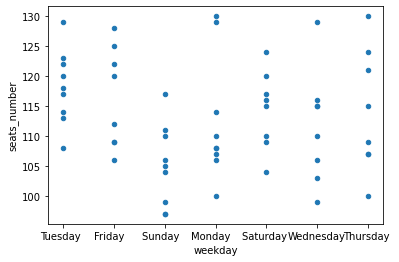

In [27]:
# Посмотрим загруженность рейсов по дням недели
SVO.plot(x='weekday', y='seats_number', kind = 'scatter')

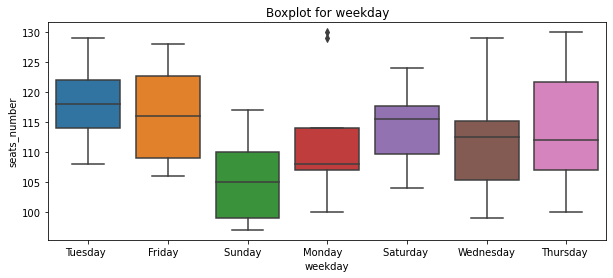

In [28]:
get_boxplot('weekday', 'seats_number', SVO)

Во вторник, пятницу и субботу загруженность больше, чем в другие дни недели.

In [29]:
# Сгруппируем данные по дням недели
grouped_SVO = round(SVO.groupby(['weekday']).mean(), 2)
grouped_SVO

,flight_id,seats_number,total_amount,duration,profit
weekday,,,,,
Friday,136349.12,116.38,1694625.00,100.0,1477975.00
Monday,136316.00,112.44,1625066.67,100.0,1408416.67
Saturday,136286.38,114.38,1667325.00,100.0,1450675.00
Sunday,136278.11,105.11,1540355.56,100.0,1323705.56
Thursday,136305.62,114.12,1651475.00,100.0,1434825.00
Tuesday,136307.33,118.22,1705866.67,100.0,1489216.67
Wednesday,136247.38,111.62,1620375.00,100.0,1403725.00


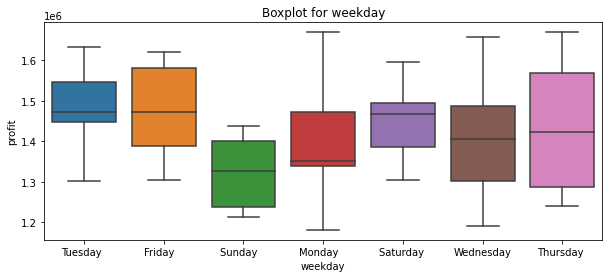

In [30]:
# Посмотрим распределение прибыли по дням недели.
get_boxplot('weekday', 'profit', SVO)

In [31]:
# Посмотрим на 10% рейсов с самой низкой прибылью.
SVO.sort_values(by=['profit']).head(6)

,flight_id,seats_number,total_amount,flight_no,departure,weekday,duration,departure_airport,arrival_airport,aircraft_code,profit
54,136464,100,1398000.0,PG0252,2017-01-09 13:05:00,Monday,100.0,AAQ,SVO,733,1181350.0
21,136250,99,1407800.0,PG0252,2017-02-08 13:05:00,Wednesday,100.0,AAQ,SVO,733,1191150.0
2,136122,97,1431000.0,PG0252,2017-01-08 13:05:00,Sunday,100.0,AAQ,SVO,733,1214350.0
12,136178,99,1434600.0,PG0252,2017-01-29 13:05:00,Sunday,100.0,AAQ,SVO,733,1217950.0
38,136360,97,1455400.0,PG0252,2017-02-05 13:05:00,Sunday,100.0,AAQ,SVO,733,1238750.0
16,136204,107,1457800.0,PG0252,2017-02-23 13:05:00,Thursday,100.0,AAQ,SVO,733,1241150.0


Предварительное предложение: По воскресеньям заменить модель самолета на Sukhoi Superjet-100. У него меньше расход топлива, а загруженность рейсов по воскресеньям меньше, чем в другие дни.

После дополнительного анализа других затрат, можно отменить рейсы в один из дней недели, например, по понедельникам, средам или четвергам, так как в эти дни  низкая средняя загрузка и выручка. Если не заменять модель самолета по воскресеньям, то можно отменить рейсы по воскресеньям.


Если сравнить даты, когда была получена наименьшая выручка по обоим направлениям, можно заметить, что в обе выборки попало 23 февраля. Стоит обратить на это внимание.


Для принятия окончательного решения необходимо узнать точную стоимость топлива, расходы на предполетную подготовку бортов, зарплату экипажа и т.п., и уже на основании этих данных принимать решение.
